# Descent Methods

Contents:
- Steepest Descent
- Newtons' Method
- Bisection Method

Author: Abijith J. Kamath, IISc. https://kamath-abhijith.github.io

In [197]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

## Bisection Method

Let $f:\mathbb{R}\mapsto\mathbb{R}$. The bisection method is an algorithm to find the roots of $f$. Suppose $f$ is continuous and differentiable, the bisection method can be used to compute the local minima and local miniisers of $f$ by using the bisection method on $f'$.

In [198]:
## FUNCTION DEFINITION: BISECTION METHOD

def bisect(interval, tol=0.01, max_iterations=100):

    x_left = interval[0]
    x_right = interval[1]

    for iter in range(max_iterations):
        x_mid = (x_left+x_right)/2.0
        if (grad_f(x_mid) == 0) or ((x_right-x_left)/2.0<=tol):
            break
        elif grad_f(x_mid)*grad_f(x_left) < 0:
            x_right = x_mid
        elif grad_f(x_mid)*grad_f(x_left) > 0:
            x_left = x_mid
    
    return iter+1, x_mid

In [199]:
## EXAMPLE: BISECTION METHOD

# Define support
x = np.arange(0,7,0.001)

# Define function and its gradient
def f(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

def grad_f(x):
    return 4*x**3 - 42*x**2 + 120*x - 70

# Bisection method to find stationary points
tol = 0.01
max_iterations = 100
interval = (0,2)
iter, root = bisect(interval,tol,max_iterations)

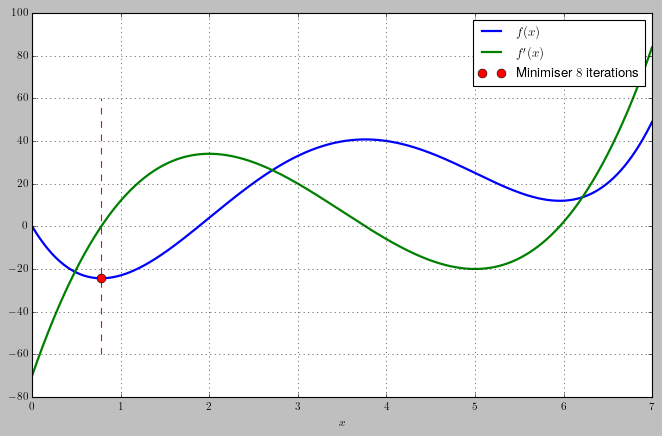

In [200]:
## PLOTS: BISECTION METHOD
style.use('classic')

rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}']

plt.figure(figsize=(10,6))
plt.plot(x,f(x),color='blue', linewidth=2, label=r"$f(x)$")
plt.plot(x,grad_f(x),color='green', linewidth=2, label=r"$f'(x)$")
plt.plot(root*np.ones(100), np.linspace(-60,60,100), '--r')
plt.plot(root,f(root),'o', markersize=8, color='red', label=r"Minimiser $%d$ iterations"%(iter))
plt.xlabel(r"$x$")
plt.grid()
plt.legend()
plt.show()

## Gradient Descent for Exact Quadratic Functions

Consider the function $f: \mathbb{R}^n \mapsto \mathbb{R}$ defined by $f(x) = \frac{1}{2}x^TQx - b^Tx$, where $Q\in \mathbb{S}_{++}^n$ and $b\in\mathbb{R}^n$. The function $f$ is strictly convex and has a unique global minimiser $x^* = Q^{-1}b$.

In [303]:
## FUNCTION DEFINITION: GRADIENT DESCENT FOR QUADRATIC FUNCTIONS
def grad_quad(x,Q,b):
    return Q.dot(x) - b

def grad_desc_quad(x_init, x_sol, step_size=0.01, tol=0.001, max_iterations=500000):

    x = x_init
    for iter in range(max_iterations):
        x -= step_size*grad_quad(x,Q,b)
        if np.linalg.norm(x-x_sol, 2) <= tol:
            break

    return iter+1, x

In [306]:
## EXAMPLE: GRADIENT DESCENT FOR EXACT QUADRATIC FUNCTIONS

# Define quadratic function
Q = np.array([[2.3346, 1.1384, 2.5606, 1.4507],
             [1.1384, 0.7860, 1.2743, 0.9531],
             [2.5606, 1.2743, 2.8147, 1.6487],
             [1.4507, 0.9531, 1.6487, 1.8123]])
b = np.array([0.4218, 0.9157, 0.7922, 0.9595])

# Closed form solution to the minimiser
x_sol = np.linalg.solve(Q,b)

# Gradient descent approximation to the minimiser
x_init = np.array([-135.1150, -4.5224, 130.1168, -5.6879])
step_size = 0.2
tol = 0.0001
num_iter, x_gd = grad_desc_quad(x_init, x_sol, step_size, tol)

print("Gradient descent with step size %.4f takes %d iterations to solve within an error of %.4f"%(step_size, num_iter, tol))
print(x_gd)

# Step size
# x_init = np.array([-135.1150, -4.5224, 130.1168, -5.6879])
# alpha = (x_init - x_sol)/(Q.dot(x_init)-b)
# print(alpha)

Gradient descent with step size 0.2000 takes 10 iterations to solve within an error of 0.0001
[-135.68543181   -4.82851873  129.48584639   -6.11529548]


## Gradient Descent for Functions in $C^2(\mathbb{R})$

Consider a twice differentiable function $f:\mathbb{R}^n\mapsto \mathbb{R}$. Local minimisers of $f$ are found in the set of stationary points $\{x\in\mathbb{R}^n \vert \nabla f(x) = 0\}$ where $\nabla^2 f(x) \in S_{+}^n$.

In [295]:
## FUNCTION DEFINITION: GRADIENT DESCENT FOR ROSEN 2D

def rosen_2d(X):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return a*a + b*b*100.

def rosen_2d_grad(X):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return np.array([-2*a - 400*b*x, 200*b])

def rosen_2d_Hess(X):
    x = X[0]
    y = X[1]
    h11=2-400*y + 1200*x*x
    h12=-400*x
    h22=200
    return np.array([[h11,h12], [h12,h22]])

def grad_desc_rosen(x_init, step_size=0.01, tol=0.001, max_iterations=1000000):
    
    x = x_init
    for iter in range(max_iterations):
        grad = rosen_2d_grad(x)
        x -= step_size*grad
        if np.linalg.norm(grad,2) <= tol:
            break

    return iter+1, x

def newton_rosen(x_init, tol=0.001, max_iterations=1000000):
    x = x_init
    for iter in range(max_iterations):
        grad = rosen_2d_grad(x)
        hess = rosen_2d_Hess(x)
        x -= np.linalg.inv(hess).dot(grad)
        if np.linalg.norm(grad,2) <= tol:
            break

    return iter+1, x


In [225]:
## EXAMPLE: ROSEN 2D

x_init = np.array([1.2, 1.2])
step_size = 0.005
tol = 0.1
max_iterations = 100
num_iter, x_sol = grad_desc_rosen(x_init, step_size, tol)

print("Gradient descent with step size %.4f takes %d iterations to solve within an error of %.4f"%(step_size, num_iter, tol))
print("The gradient descent solution obtained: ", x_sol)

Gradient descent with step size 0.0050 takes 1000000 iterations to solve within an error of 0.1000
The gradient descent solution obtained:  [nan nan]


In [238]:
## EXAMPLE: ROSEN 2D, NEWTON METHOD

x_init = np.array([1.2, 1.2])
tol = 0.0001
max_iterations = 100
num_iter, x_sol = newton_rosen(x_init, tol, max_iterations)

print("Newton method takes %d iterations to solve within an error of %.4f"%(num_iter, tol))
print("The Newton method solution obtained: ", x_sol)

Newton method takes 6 iterations to solve within an error of 0.0001
The Newton method solution obtained:  [1. 1.]


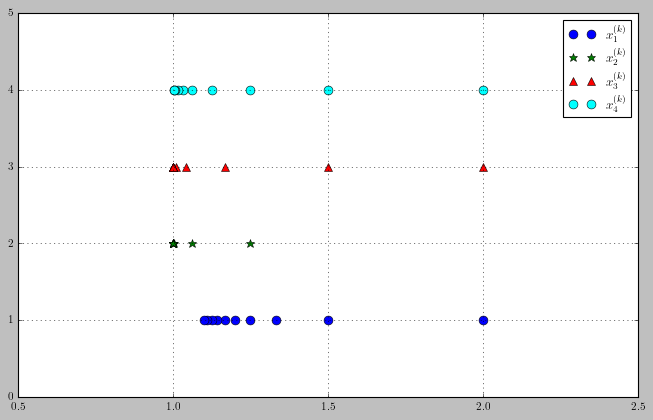

In [292]:
## CONVERGING SEQUENCES

k = np.arange(1,11)
x1 = 1 + 1/k
x2 = 1 + (0.5)**(2**k)
x3 = np.zeros(10)
for i in range(10):
    x3[i] = 1 + 1/np.math.factorial(i+1)

x4 = np.zeros(10)
x4[0] = 2
for i in range(9):
    x4[i+1] = x4[i] - (0.5)**(i+1)

## PLOTS
plt.figure(figsize=(10,6))
plt.plot(x1, 1*np.ones(10), 'o', color='blue', markersize=8, label=r"$x_1^{(k)}$")
plt.plot(x2, 2*np.ones(10), '*', color='green', markersize=8, label=r"$x_2^{(k)}$")
plt.plot(x3, 3*np.ones(10), '^', color='red', markersize=8, label=r"$x_3^{(k)}$")
plt.plot(x4, 4*np.ones(10), 'o', color='cyan', markersize=8, label=r"$x_4^{(k)}$")
plt.grid()
plt.ylim([0,5])
plt.xlim([0.5,2.5])
plt.legend()
plt.show()

In [284]:
max_iterations = 2000

k = np.arange(1,max_iterations+1)
x1 = 1 + 1/k
x2 = 1 + (0.5)**(2**k)
x3 = np.zeros(max_iterations)
for i in range(max_iterations):
    x3[i] = 1 + 1/np.math.factorial(i)

x4 = np.zeros(max_iterations)
x4[0] = 2
for i in range(max_iterations-1):
    x4[i+1] = x4[i] - (0.5)**(i+1)

tol = 0.00001
for iter in range(max_iterations):
    if x3[iter]<=(1+tol):
        break
print(iter+1)

10
